# Ex02-Outlier

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using IQR 

(2) After removing outliers in step 1, you get a new dataframe.

(3) use zscore of 3 to remove outliers. This is quite similar to IQR and you will get exact same result

(4) for the data set height_weight.csv find the following

    (i) Using IQR detect weight outliers and print them

    (ii) Using IQR, detect height outliers and print them

#1)

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Semester 3/19AI403 - Data Science/bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [72]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [73]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [75]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [76]:
df.shape

(13200, 7)

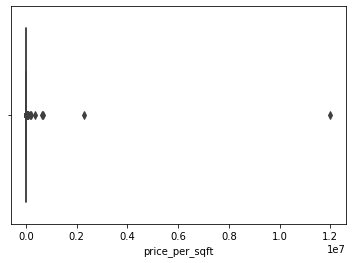

In [77]:
sns.boxplot(x="price_per_sqft",data=df)

In [155]:
q1 = df['price_per_sqft'].quantile(0.35)
q3 = df['price_per_sqft'].quantile(0.65)
print("First Quantile =",q1,"\nSecond Quantile =",q3)

IQR = q3-q1
ul = q3+1.5*IQR
ll = q1-1.5*IQR

df1 =df[((df['price_per_sqft']>=ll)&(df['price_per_sqft']<=ul))]
df1

First Quantile = 4734.65 
Second Quantile = 6363.0


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [109]:
df1.shape

(10953, 7)

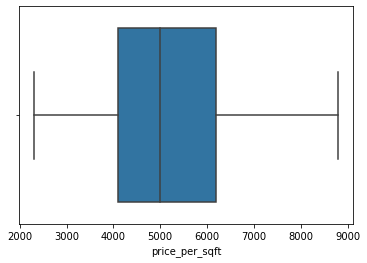

In [110]:
sns.boxplot(x="price_per_sqft",data=df1)

# (3)

In [111]:
from scipy import stats

z = np.abs(stats.zscore(df['price_per_sqft']))
df2 = df[(z<3)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [152]:
print(df2.shape)

(13195, 7)


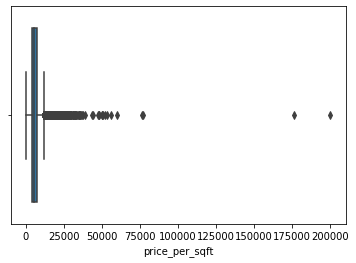

In [153]:
sns.boxplot(x="price_per_sqft",data=df2)

# 4)


In [115]:
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Semester 3/19AI403 - Data Science/height_weight.csv")
df3

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [116]:
df3.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [117]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  10000 non-null  object 
 1   height  10000 non-null  float64
 2   weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [118]:
df3.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [119]:
df3.isnull().sum()

gender    0
height    0
weight    0
dtype: int64

In [120]:
df3.shape

(10000, 3)

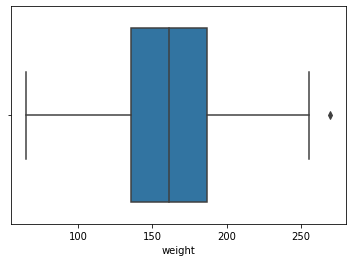

In [137]:
sns.boxplot(x="weight",data=df3)

In [130]:
q1 = df3['weight'].quantile(0.25)
q3 = df3['weight'].quantile(0.75)
print("First Quantile =",q1,"\nSecond Quantile =",q3)

IQR = q3-q1
ul = q3+1.5*IQR
ll = q1-1.5*IQR

df4 =df3[((df3['weight']>=ll)&(df3['weight']<=ul))]
df4

First Quantile = 135.8180513055015 
Second Quantile = 187.16952486868348


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [131]:
df4.shape

(9999, 3)

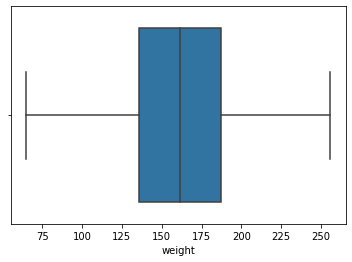

In [132]:
sns.boxplot(x="weight",data=df4)

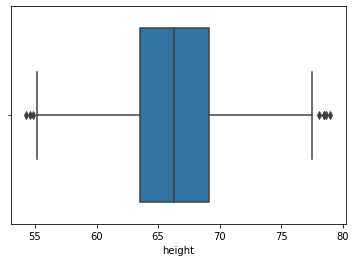

In [138]:
sns.boxplot(x="height",data=df3)

In [149]:
q1 = df3['height'].quantile(0.25)
q3 = df3['height'].quantile(0.75)
print("First Quantile =",q1,"\nSecond Quantile =",q3)

IQR = q3-q1
ul = q3+1.5*IQR
ll = q1-1.5*IQR

df5 =df3[((df3['height']>=ll)&(df3['height']<=ul))]
df5

First Quantile = 63.505620481218955 
Second Quantile = 69.1742617268347


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [150]:
df5.shape

(9992, 3)

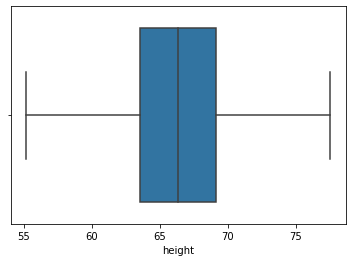

In [151]:
sns.boxplot(x="height",data=df5)